In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer









df_train=pd.read_csv("train.csv").drop("id",axis=1).drop("Unnamed: 0",axis=1).drop_duplicates()
df_test=pd.read_csv("test.csv").drop("id",axis=1).drop("Unnamed: 0",axis=1).drop_duplicates()
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
df_train.describe(include="object").T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [ ]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,103904,2,Loyal Customer,84923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,NaN,NaN,NaN,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,NaN,NaN,NaN,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


In [ ]:
df_train.columns=df_train.columns.str.lower().str.replace(" ","_")
df_test.columns=df_test.columns.str.lower().str.replace(" ","_")
df_train.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df_train.isnull().sum()

,0
gender,0
customer_type,0
age,0
type_of_travel,0
class,0
flight_distance,0
inflight_wifi_service,0
departure/arrival_time_convenient,0
ease_of_online_booking,0
gate_location,0


In [ ]:
df_train.arrival_delay_in_minutes= df_train.arrival_delay_in_minutes.fillna(df_train.departure_delay_in_minutes).fillna(0)
df_train.isnull().sum()

,0
gender,0
customer_type,0
age,0
type_of_travel,0
class,0
flight_distance,0
inflight_wifi_service,0
departure/arrival_time_convenient,0
ease_of_online_booking,0
gate_location,0


In [ ]:
df_test.isnull().sum()

,0
gender,0
customer_type,0
age,0
type_of_travel,0
class,0
flight_distance,0
inflight_wifi_service,0
departure/arrival_time_convenient,0
ease_of_online_booking,0
gate_location,0


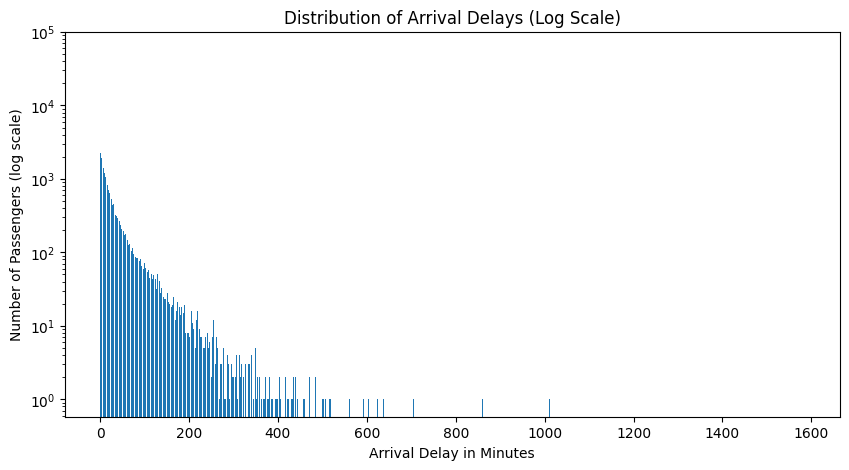

In [ ]:
counts = df_train['arrival_delay_in_minutes'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(counts.index, counts.values)
plt.yscale('log')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Number of Passengers (log scale)')
plt.title('Distribution of Arrival Delays (Log Scale)')
plt.show()


In [ ]:
nums=df_train.select_dtypes(include="number").columns.to_list()
nums

['age',
 'flight_distance',
 'inflight_wifi_service',
 'departure/arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes']

In [ ]:
categoical = df_train.select_dtypes(include="object").columns.to_list()
categoical.remove("satisfaction")
categoical

['gender', 'customer_type', 'type_of_travel', 'class']

In [ ]:
num_imputer = SimpleImputer(strategy='median')
df_train[nums] = num_imputer.fit_transform(df_train[nums])
df_test[nums] = num_imputer.transform(df_test[nums])

In [ ]:
df_test.isnull().sum()

,0
gender,0
customer_type,0
age,0
type_of_travel,0
class,0
flight_distance,0
inflight_wifi_service,0
departure/arrival_time_convenient,0
ease_of_online_booking,0
gate_location,0


In [ ]:
df_train.isnull().sum()

,0
gender,0
customer_type,0
age,0
type_of_travel,0
class,0
flight_distance,0
inflight_wifi_service,0
departure/arrival_time_convenient,0
ease_of_online_booking,0
gate_location,0


In [ ]:
df_train['satisfaction'] = df_train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
df_test['satisfaction'] = df_test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

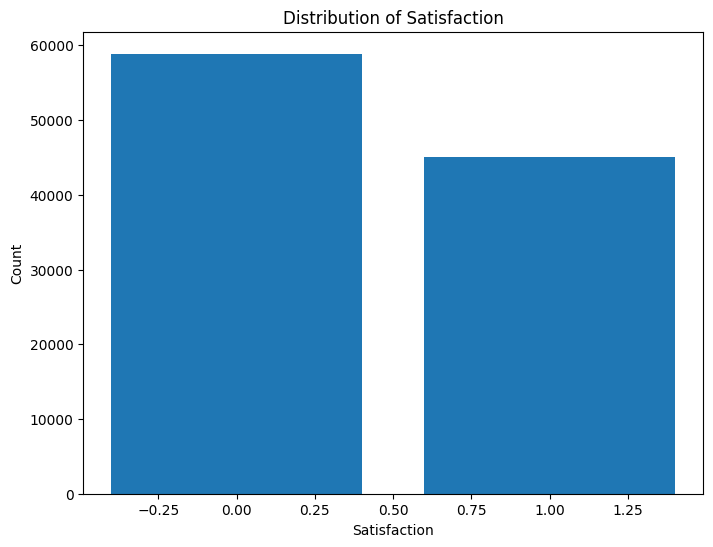

In [ ]:
satisfaction_counts = df_train['satisfaction'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(satisfaction_counts.index, satisfaction_counts.values)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction')
plt.show()

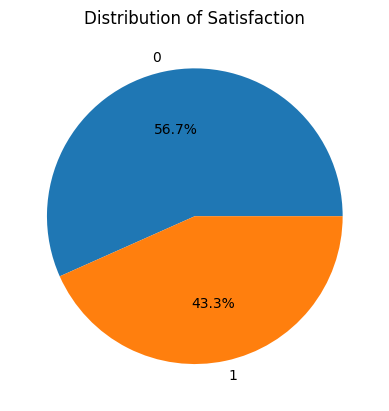

In [ ]:
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Satisfaction')
plt.show()#####---------------no imbalance

In [ ]:
##  risk and diff ratios
from IPython.display import display

for s in categoical:
    df_sat_g = df_train.groupby(s).satisfaction.agg(['count','mean'])
    df_sat_g['risk'] = np.log(df_sat_g['mean'] / (1 - df_sat_g['mean']))
    df_sat_g['diff_ratio'] = df_sat_g['mean'] - (1 - df_sat_g['mean'])
    display(df_sat_g)

,count,mean,risk,diff_ratio
gender,,,,
Female,52727,0.427371,-0.292585,-0.145258
Male,51177,0.439475,-0.243294,-0.121050


,count,mean,risk,diff_ratio
customer_type,,,,
Loyal Customer,84923,0.477291,-0.090898,-0.045418
disloyal Customer,18981,0.236658,-1.171092,-0.526685


,count,mean,risk,diff_ratio
type_of_travel,,,,
Business travel,71655,0.582597,0.333444,0.165194
Personal Travel,32249,0.101678,-2.178722,-0.796645


,count,mean,risk,diff_ratio
class,,,,
Business,49665,0.694251,0.820071,0.388503
Eco,46745,0.186138,-1.475305,-0.627725
Eco Plus,7494,0.246064,-1.119718,-0.507873


In [ ]:
from sklearn.metrics import mutual_info_score

def mutual_info_seires (series):
  return mutual_info_score(series,df_train.satisfaction)

mutual_info = df_train[categoical].apply(mutual_info_seires)
mutual_info.sort_values(ascending=False)
mutual_info


#--- so gender dosent mean shit

,0
gender,0.000075
customer_type,0.018590
type_of_travel,0.113635
class,0.133508


In [ ]:
corr_data = df_train[nums].corrwith(df_train.satisfaction)

corr_data= corr_data.sort_values(ascending=False)
corr_data

,0
online_boarding,0.503557
inflight_entertainment,0.398059
seat_comfort,0.349459
on-board_service,0.322383
leg_room_service,0.313131
cleanliness,0.305198
flight_distance,0.298780
inflight_wifi_service,0.284245
baggage_handling,0.247749
inflight_service,0.244741


/tmp/ipython-input-3261859988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_data.values, y=corr_data.index, palette='coolwarm')


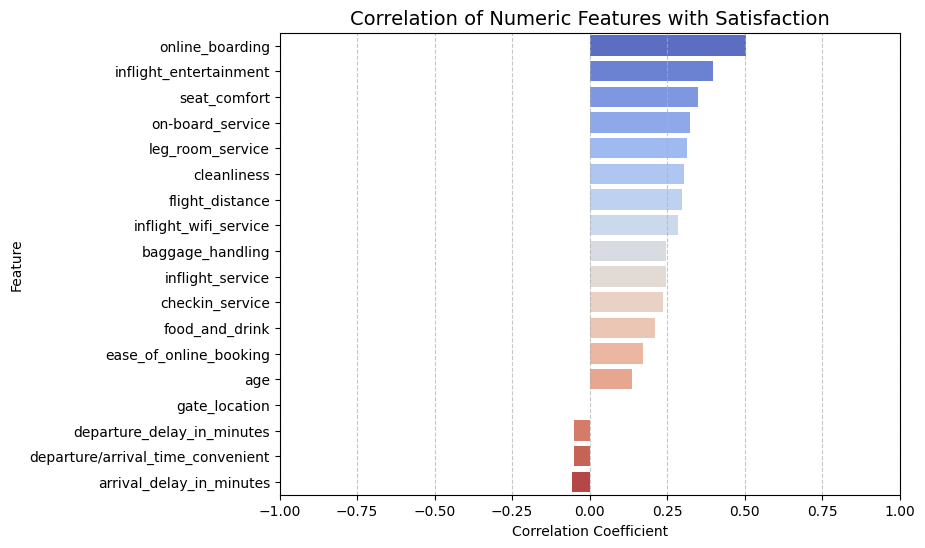

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_data.values, y=corr_data.index, palette='coolwarm')
plt.title('Correlation of Numeric Features with Satisfaction', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# here gate location means nothing

In [ ]:
categoical , nums

(['gender', 'customer_type', 'type_of_travel', 'class'],
 ['age',
  'flight_distance',
  'inflight_wifi_service',
  'departure/arrival_time_convenient',
  'ease_of_online_booking',
  'gate_location',
  'food_and_drink',
  'online_boarding',
  'seat_comfort',
  'inflight_entertainment',
  'on-board_service',
  'leg_room_service',
  'baggage_handling',
  'checkin_service',
  'inflight_service',
  'cleanliness',
  'departure_delay_in_minutes',
  'arrival_delay_in_minutes'])

In [ ]:
imp_cats= categoical.copy()
imp_cats.remove('gender')
imp_cats

['customer_type', 'type_of_travel', 'class']

In [ ]:
imp_nums=nums.copy()
imp_nums.remove('gate_location')
imp_nums.remove('departure_delay_in_minutes')
imp_nums

['age',
 'flight_distance',
 'inflight_wifi_service',
 'departure/arrival_time_convenient',
 'ease_of_online_booking',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'arrival_delay_in_minutes']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_encode_scale_impute (categoicalss, numsss):

  num_transformer = Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="median")),
      ("scalar", StandardScaler())
  ])

  cat_transformer= Pipeline(steps=[
      ("imputer" , SimpleImputer(strategy="most_frequent")),
      ("encoder" , OneHotEncoder(handle_unknown='ignore', drop='first'))
  ])

  preprocess= ColumnTransformer(
      transformers=[
          ("nums",num_transformer,numsss),
          ("cat",cat_transformer,categoicalss)
      ],
      remainder='passthrough'
  )

  return preprocess

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

prepros = preprocess_encode_scale_impute(imp_cats, imp_nums)
model = Pipeline(steps=[
    ('preprocessor', prepros),
    ('classifier', RandomForestClassifier(random_state=42))
])
cv_scores = cross_val_score(
    model,
    df_train[imp_cats + imp_nums],        # features
    df_train['satisfaction'],             # target
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


model.fit(df_train[imp_cats + imp_nums], df_train['satisfaction'])
y_train_pred = model.predict(df_train[imp_cats + imp_nums])

Cross-validation scores: [0.96073336 0.96184014 0.9594341  0.96294692 0.96361886]
Mean CV Accuracy: 0.9617146780122641


In [ ]:
from sklearn.metrics import classification_report


y_pred = model.predict(df_test[imp_cats + imp_nums])



print(classification_report(y_pred,df_test['satisfaction']))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14927
           1       0.94      0.97      0.96     11049

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



<Figure size 600x600 with 0 Axes>

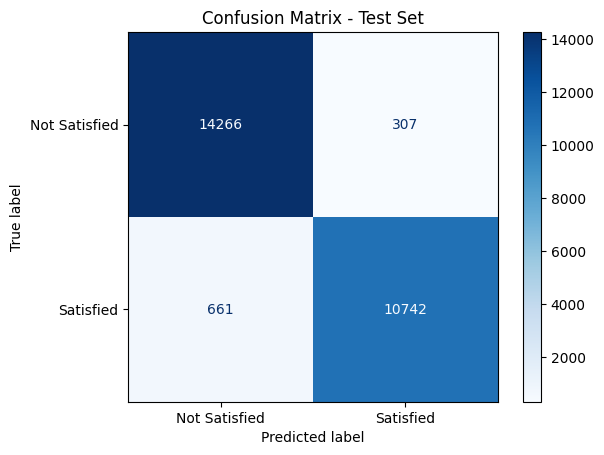

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['satisfaction'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()


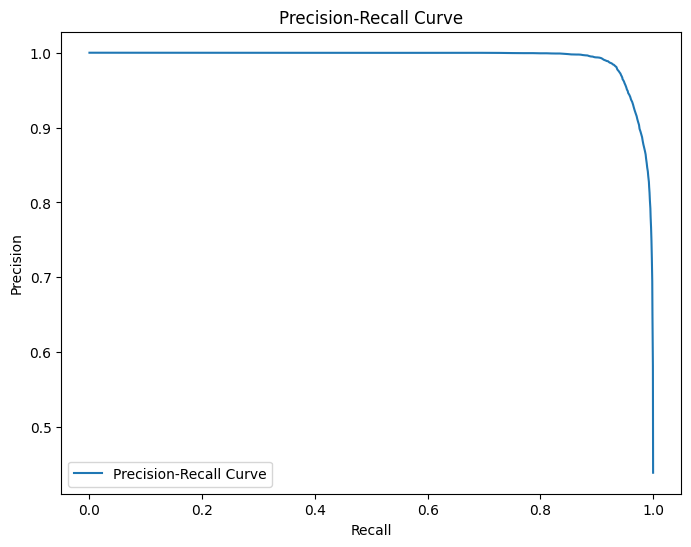

In [ ]:
from sklearn.metrics import precision_recall_curve


y_proba = model.predict_proba(df_test[imp_cats + imp_nums])[:, 1]

prec, rec, _ = precision_recall_curve(df_test['satisfaction'], y_proba)

plt.figure(figsize=(8,6))
plt.plot(rec, prec, label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()